## FLAML for hp optimisation and model selection
We use FLAML twice, first to find the best component model for each estimator, and then to optimise the estimators themselves and choose the best estimator. Here we show how it's done

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import warnings
warnings.filterwarnings('ignore') # suppress sklearn deprecation warnings for now.. 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# the below checks for whether we run dowhy and auto-causality from source
root_path = root_path = os.path.realpath('../..')
try: 
    import auto_causality
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "auto-causality"))
    
try:
    import dowhy
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "dowhy"))

In [2]:
# this makes the notebook expand to full width of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%%javascript

// turn off scrollable windows for large output
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
from auto_causality import AutoCausality
from auto_causality.datasets import synth_ihdp, preprocess_dataset
from auto_causality.scoring import ate, group_ate

### Model fitting & scoring
Here we fit a (selection of) model(s) to the data and score them with the ERUPT metric on held-out data

In [5]:
# import dataset
data_df = synth_ihdp()
data_df, features_X, features_W, targets, treatment = preprocess_dataset(data_df)
outcome = targets[0]

train_df, test_df = train_test_split(data_df, test_size=0.2)

In [6]:

# If you want to use specific estimators, comment in the estimator_list below
# to include any estimators whose full name contains any of the elements of 
# estimator_list
# The other allowed values are 'all' and 'auto', the default is 'auto'
ac = AutoCausality(
    time_budget=1200, 
#     estimator_list=[
#             "Dummy",
#             "SparseLinearDML",
#             "ForestDRLearner",
#             "TransformedOutcome",
#             "CausalForestDML",
#             ".LinearDML",
#             "DomainAdaptationLearner",
#             "SLearner",
#             "XLearner",
#             "TLearner",
#             "Ortho",
#         ],
    metric="norm_erupt", 
    verbose=3,
    components_verbose=2,
    components_time_budget=60,
)


# run autocausality
myresults = ac.fit(train_df, treatment, outcome, features_W, features_X)

# return best estimator
print(f"Best estimator: {ac.best_estimator}")
# config of best estimator:
print(f"best config: {ac.best_config}")
# best score:
print(f"best score: {ac.best_score}")


[flaml.tune.tune: 04-22 10:35:54] {326} WARNING - Using CFO for search. To use BlendSearch, run: pip install flaml[blendsearch]
[flaml.tune.tune: 04-22 10:35:54] {447} INFO - trial 1 config: {'estimator': {'estimator_name': 'backdoor.auto_causality.models.Dummy'}}


Initial configs: [{'estimator': {'estimator_name': 'backdoor.auto_causality.models.Dummy'}}, {'estimator': {'estimator_name': 'backdoor.econml.metalearners.SLearner'}}, {'estimator': {'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner'}}, {'estimator': {'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1e-06, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': True, 'subforest_size': 4}}, {'estimator': {'estimator_name': 'backdoor.econml.dml.CausalForestDML', 'drate': True, 'n_estimators': 100, 'criterion': 'mse', 'min_samples_split': 10, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': True, 'fit_intercept': True, 'subforest_size': 4}}, {'estimator': {'estima

[flaml.tune.tune: 04-22 10:36:41] {108} INFO - result: {'norm_erupt': 2.6062514047704193, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D64493D0>, 'estimator_name': 'backdoor.auto_causality.models.Dummy', 'scores': {'train': {'erupt': 6.401237451902005, 'norm_erupt': 2.346217687031834, 'qini': 0.013967139355122074, 'auc': 0.49355316947804045, 'ate': 4.052802503277649, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9D645EA60>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True         True  0.000000
1        0.0   4.177793  0.194969    True         True  0.000000
2        1.0   6.307376  0.194969    True        False  5.129032
3        0.0   2.260458  0.194969    True        False  0.000000
4        0.0   2.540389  0.194969    True         True  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.773293  0.194969

{'estimator_name': 'backdoor.econml.metalearners.SLearner'}


[flaml.tune.tune: 04-22 10:38:24] {108} INFO - result: {'norm_erupt': 2.745784131485274, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D646BA30>, 'estimator_name': 'backdoor.econml.metalearners.SLearner', 'scores': {'train': {'erupt': 6.407817902302282, 'norm_erupt': 2.5649349515576545, 'qini': 0.0008903106411841898, 'auc': 0.5630870502716034, 'ate': 3.7365569101058957, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9D69DF610>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True        False  0.000000
1        0.0   4.177793  0.194969    True        False  0.000000
2        1.0   6.307376  0.194969    True         True  5.089272
3        0.0   2.260458  0.194969    True         True  0.000000
4        0.0   2.540389  0.194969    True        False  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.773293  0.1949

{'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner'}


[flaml.tune.tune: 04-22 10:41:25] {108} INFO - result: {'norm_erupt': 2.742247477160677, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D65A55B0>, 'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner', 'scores': {'train': {'erupt': 6.407817902302282, 'norm_erupt': 2.6849854002315983, 'qini': -0.02696704699989381, 'auc': 0.5705451047872113, 'ate': 3.970728214711409, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9D6DB9340>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True         True  0.000000
1        0.0   4.177793  0.194969    True        False  0.000000
2        1.0   6.307376  0.194969    True         True  5.089272
3        0.0   2.260458  0.194969    True         True  0.000000
4        0.0   2.540389  0.194969    True        False  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.7

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1e-06, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-22 10:43:28] {108} INFO - result: {'norm_erupt': 2.8070073379315343, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D66A31F0>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.401237451902005, 'norm_erupt': 2.679155514326078, 'qini': -0.014310741862901353, 'auc': 0.5779086139333264, 'ate': 3.9714200572662075, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9D8DAF220>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True         True  0.000000
1        0.0   4.177793  0.194969    True        False  0.000000
2        1.0   6.307376  0.194969    True         True  5.129032
3        0.0   2.260458  0.194969    True         True  0.000000
4        0.0   2.540389  0.194969    True         True  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.773293  0.194969 

{'estimator_name': 'backdoor.econml.dml.CausalForestDML', 'drate': 1, 'n_estimators': 100, 'criterion': 'mse', 'min_samples_split': 10, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': 1, 'fit_intercept': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-22 10:45:29] {108} INFO - result: {'norm_erupt': 2.660590225462348, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D6556FA0>, 'estimator_name': 'backdoor.econml.dml.CausalForestDML', 'scores': {'train': {'erupt': 6.401237451902005, 'norm_erupt': 2.75878941878653, 'qini': 0.07637089231509012, 'auc': 0.5632808433019459, 'ate': 3.737393945986429, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9D8CFC760>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True        False  0.000000
1        0.0   4.177793  0.194969    True        False  0.000000
2        1.0   6.307376  0.194969    True         True  5.129032
3        0.0   2.260458  0.194969    True        False  0.000000
4        0.0   2.540389  0.194969    True        False  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.773293  0.194969    T

{'estimator_name': 'backdoor.auto_causality.models.TransformedOutcome'}


[flaml.tune.tune: 04-22 10:46:29] {108} INFO - result: {'norm_erupt': 2.814540428045824, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D65B18B0>, 'estimator_name': 'backdoor.auto_causality.models.TransformedOutcome', 'scores': {'train': {'erupt': 6.009412848329196, 'norm_erupt': 2.6805678081949136, 'qini': 0.09853095189491744, 'auc': 0.5310826585357089, 'ate': 4.5511365, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9D70E2BB0>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True         True  0.000000
1        0.0   4.177793  0.194969   False        False  1.195585
2        1.0   6.307376  0.194969   False        False  0.000000
3        0.0   2.260458  0.194969    True         True  0.000000
4        0.0   2.540389  0.194969    True        False  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.773293  0.194

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1e-06, 'n_estimators': 199, 'min_samples_split': 7, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.0, 'max_features': 'sqrt', 'min_impurity_decrease': 1.1206945115586873, 'max_samples': 0.3826945204007307, 'min_balancedness_tol': 0.48820697359223325, 'honest': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-22 10:48:30] {108} INFO - result: {'norm_erupt': 2.52108627816905, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D6C416A0>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.401237451902005, 'norm_erupt': 2.349617039454946, 'qini': -0.00348105076128559, 'auc': 0.5326919179002432, 'ate': 3.863582620777122, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9D79A7D90>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True        False  0.000000
1        0.0   4.177793  0.194969    True        False  0.000000
2        1.0   6.307376  0.194969    True        False  5.129032
3        0.0   2.260458  0.194969    True        False  0.000000
4        0.0   2.540389  0.194969    True        False  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.773293  0.194969    T

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1.1378265284620633e-06, 'n_estimators': 199, 'min_samples_split': 3, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.029951722160001207, 'max_features': 'auto', 'min_impurity_decrease': 0, 'max_samples': 0.5, 'min_balancedness_tol': 0.41179302640776677, 'honest': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-22 10:50:31] {108} INFO - result: {'norm_erupt': 2.765952576586097, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D6E46820>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.401237451902005, 'norm_erupt': 2.698122359553916, 'qini': 0.02821676730681059, 'auc': 0.5660267500412672, 'ate': 3.9131305017967097, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9D7A27BB0>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True         True  0.000000
1        0.0   4.177793  0.194969    True        False  0.000000
2        1.0   6.307376  0.194969    True         True  5.129032
3        0.0   2.260458  0.194969    True         True  0.000000
4        0.0   2.540389  0.194969    True         True  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.773293  0.194969    

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1e-06, 'n_estimators': 199, 'min_samples_split': 5, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.0, 'max_features': 'log2', 'min_impurity_decrease': 0.9031913202482567, 'max_samples': 0.4536883629413131, 'min_balancedness_tol': 0.48414770462408885, 'honest': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-22 10:52:32] {108} INFO - result: {'norm_erupt': 2.52108627816905, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D6FD6C70>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.401237451902005, 'norm_erupt': 2.349617039454946, 'qini': -0.02943475923310201, 'auc': 0.5324959393234399, 'ate': 3.945238969613034, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9D7BF39A0>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True        False  0.000000
1        0.0   4.177793  0.194969    True        False  0.000000
2        1.0   6.307376  0.194969    True        False  5.129032
3        0.0   2.260458  0.194969    True        False  0.000000
4        0.0   2.540389  0.194969    True        False  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.773293  0.194969    T

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1.2994195109835775e-06, 'n_estimators': 199, 'min_samples_split': 5, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.08500125522034516, 'max_features': 'auto', 'min_impurity_decrease': 0, 'max_samples': 0.4463116370586869, 'min_balancedness_tol': 0.4158522953759112, 'honest': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-22 10:54:33] {108} INFO - result: {'norm_erupt': 2.780733085738742, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D6C256A0>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.401237451902005, 'norm_erupt': 2.5917301278144946, 'qini': 0.0002968719686557159, 'auc': 0.5517544644208517, 'ate': 3.932805721767371, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9DFEBC220>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True         True  0.000000
1        0.0   4.177793  0.194969    True        False  0.000000
2        1.0   6.307376  0.194969    True         True  5.129032
3        0.0   2.260458  0.194969    True         True  0.000000
4        0.0   2.540389  0.194969    True         True  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.773293  0.194969  

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1.0657241908721603e-06, 'n_estimators': 199, 'min_samples_split': 5, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0, 'max_samples': 0.4211135547372624, 'min_balancedness_tol': 0.4925331497890187, 'honest': 1, 'subforest_size': 3}


[flaml.tune.tune: 04-22 10:56:34] {108} INFO - result: {'norm_erupt': 2.758495067283478, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001B9D6FE7760>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.401237451902005, 'norm_erupt': 2.6960199323445586, 'qini': 0.05322765496272606, 'auc': 0.581463952243471, 'ate': 3.932182192260211, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001B9E0117700>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.036808  0.194969    True        False  0.000000
1        0.0   4.177793  0.194969    True        False  0.000000
2        1.0   6.307376  0.194969    True         True  5.129032
3        0.0   2.260458  0.194969    True         True  0.000000
4        0.0   2.540389  0.194969    True         True  0.000000
..       ...        ...       ...     ...          ...       ...
472      0.0   3.773293  0.194969    T

Best estimator: backdoor.auto_causality.models.TransformedOutcome
best config: {'estimator': {'estimator_name': 'backdoor.auto_causality.models.TransformedOutcome'}}
best score: 2.814540428045824


In [7]:
# score all estimators on the test set, which we've kept aside up till now
from auto_causality.scoring import make_scores
for est_name, scr in ac.scores.items():
    scr['scores']['test'] = make_scores(scr['estimator'], test_df)

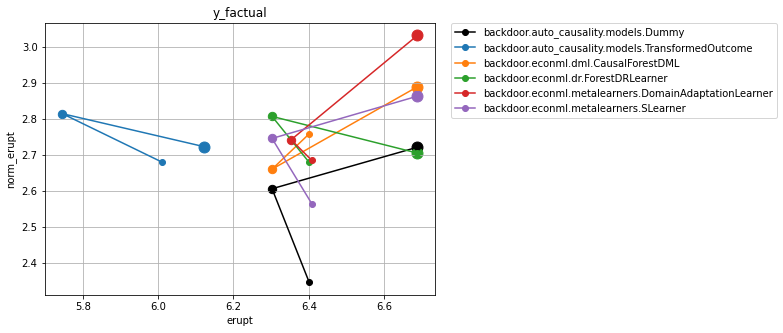

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ([matplotlib.colors.CSS4_COLORS['black']] +
    list(matplotlib.colors.TABLEAU_COLORS) + [
    matplotlib.colors.CSS4_COLORS['lime'],
    matplotlib.colors.CSS4_COLORS['yellow'],
    matplotlib.colors.CSS4_COLORS['pink']
])


plt.figure(figsize = (7,5))
plt.title(outcome)

m1 = "erupt"
m2 = "norm_erupt"

for (est, scr), col in zip(ac.scores.items(),colors):
    try:
        sc = [scr["scores"]['train'][m1], scr["scores"]['validation'][m1], scr["scores"]['test'][m1]]
        crv = [scr["scores"]['train'][m2], scr["scores"]['validation'][m2], scr["scores"]['test'][m2]]
        plt.plot(sc, crv, color=col, marker="o", label=est)
        plt.scatter(sc[1:2],crv[1:2], c=col, s=70, label="_nolegend_" )
        plt.scatter(sc[2:],crv[2:], c=col, s=120, label="_nolegend_" )

    except:
        pass
plt.xlabel(m1)
plt.ylabel(m2)

plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.grid()
plt.show()


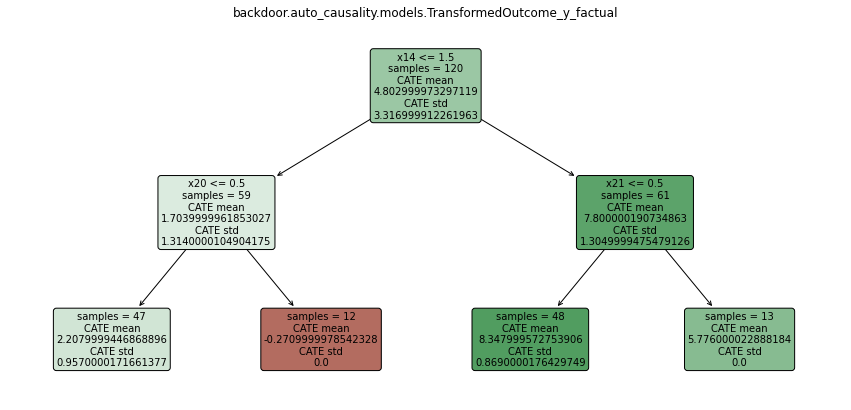

In [9]:
scr = ac.scores[ac.best_estimator]
intrp = scr["scores"]['validation']['intrp']
plt.figure(figsize=(15, 7))
intrp.plot(feature_names=intrp.feature_names, fontsize=10)
plt.title(f"{ac.best_estimator}_{outcome}")
plt.show()


y_factual backdoor.auto_causality.models.TransformedOutcome


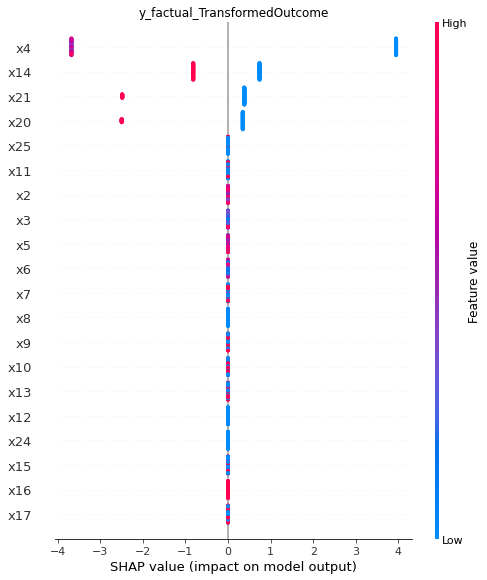

In [12]:
# TODO: add SHAP plots!
import matplotlib.pyplot as plt
import shap

# and now let's visualize feature importances!
from auto_causality.shap import shap_values

# Shapley values calculation can be slow so let's subsample
this_df = test_df.sample(100)


scr = ac.scores[ac.best_estimator]
print(outcome, ac.best_estimator)
est = ac.model
shaps = shap_values(est, this_df)

plt.title(outcome + '_' + ac.best_estimator.split('.')[-1])
shap.summary_plot(shaps, this_df[est.estimator._effect_modifier_names])
plt.show()


,policy,mean,std,count
0,all,4.174551,0.288477,150
1,True,4.555331,0.449936,68
2,False,3.879066,0.367739,82


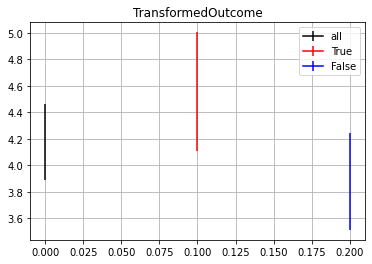

In [14]:
from auto_causality.scoring import  group_ate
# plot out-of sample difference of outcomes between treated and untreated for the points where a model predicts positive vs negative impact
my_est = ac.best_estimator
stats = []

v = ac.scores[my_est]['scores']['test']['values']

sts = group_ate(v['treated'], v[outcome], v['norm_policy'])

display(sts)


colors = (matplotlib.colors.CSS4_COLORS['black'],
    matplotlib.colors.CSS4_COLORS['red'],
    matplotlib.colors.CSS4_COLORS['blue'])

grp = sts["policy"].unique()

for i,(p,c) in enumerate(zip(grp, colors)):
    st = sts[sts["policy"] == p]
    plt.errorbar(np.array(range(len(st))) +0.1*i, st["mean"].values[0],  yerr = st["std"].values[0], color=c)
plt.legend(grp)
plt.grid(True)
plt.title(my_est.split('.')[-1])
plt.show()